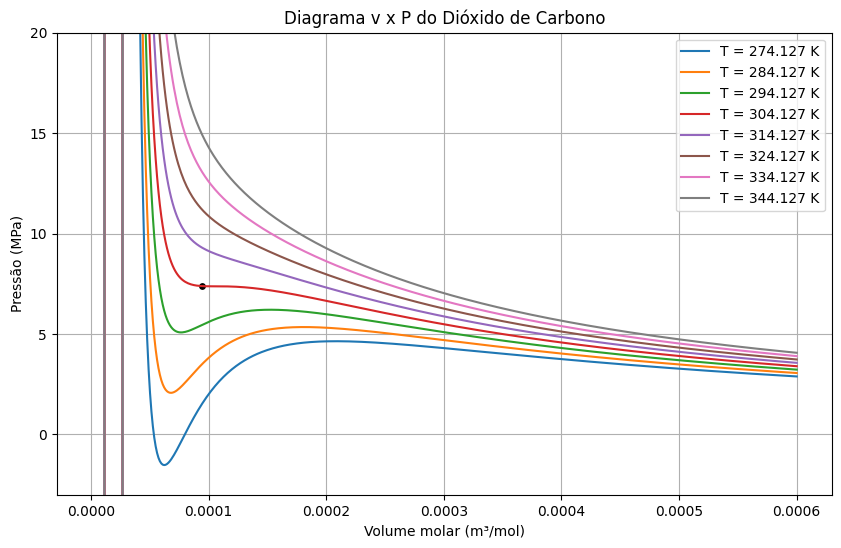

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
R = 8.314  # Constante dos gases em J/(mol·K)
Tc = 304.127  # Temperatura crítica em K
Pc = 7374800  # Pressão crítica em Pa
omega = 0.225  # Fator acêntrico

# Parâmetros de Peng-Robinson
a_c = 0.45724 * (R**2 * Tc**2) / Pc
b = 0.07780 * (R * Tc) / Pc

def alpha(Tr):
    kappa = 0.37464 + 1.54226 * omega - 0.26992 * omega**2
    return (1 + kappa * (1 - np.sqrt(Tr)))**2 #np.sqrt retorna a root de Tr

def peng_robinson(T, Vm):
    Tr = T / Tc
    a = a_c * alpha(Tr)
    term1 = R * T / (Vm - b)
    term2 = a / (Vm * (Vm + b) + b * (Vm - b))
    return term1 - term2

# Definindo volumes molares e temperaturas para as isotermas
Vm = np.linspace(0.000001, 0.0006, 500)  # Volume molar em m^3/mol, sendo (primeiro valor, último valor, número de intervalos entre vi e vf)
temperaturas = [274.127, 284.127 , 294.127, 304.127 , 314.127, 324.127, 334.127, 344.127]  # Temperaturas para as isotermas em K

# Plotando as isotermas
plt.figure(figsize=(10, 6))
for T in temperaturas:
    P = peng_robinson(T, Vm)
    plt.plot(Vm, P / 1e6, label=f'T = {T} K')


plt.title('Diagrama v x P do Dióxido de Carbono')
plt.xlabel('Volume molar (m³/mol)')
plt.ylabel('Pressão (MPa)')
plt.legend()
plt.grid(True)
plt.ylim(-3, 20)  # Ajuste o limite do eixo y conforme necessário
plt.scatter(9.4073377234243*1e-5, 7.374800 , color = 'black', s=15)

plt.show()


kappa = 0.37464 + 1.54226 * omega - 0.26992 * omega**2
Tr = T / Tc
A = P
B = b * P - R * T
C = a_c * (1 + kappa * (1 - np.sqrt(Tr)))**2 - 2 * R * T * b - 3 * P * b**2
D = P * b**3 + R * T * b**2 - a_c * b * (1 + kappa * (1 - np.sqrt(Tr)))**2

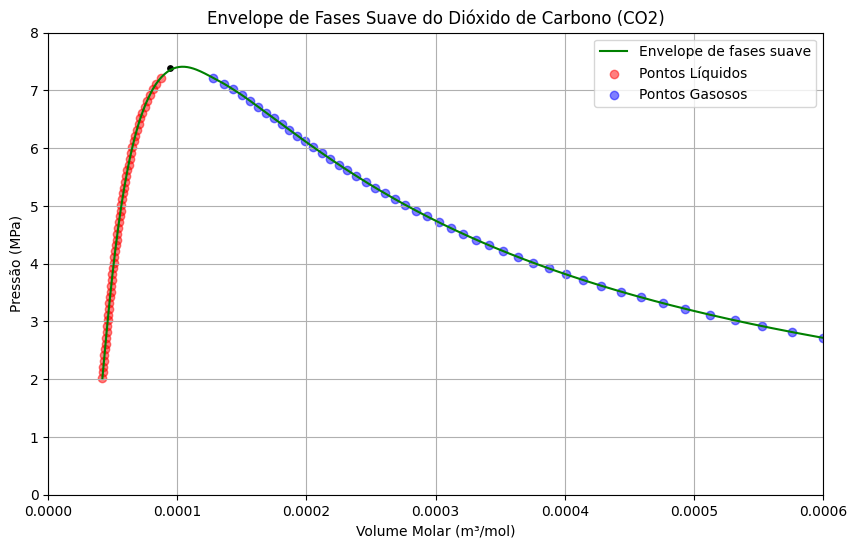

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Dados da fase líquida
v_liq = [
    0.000042014, 0.000042409, 0.000042805, 0.000043205, 0.000043608, 0.000044012,
    0.000044423, 0.000044837, 0.000045254, 0.000045678, 0.000046108, 0.000046547,
    0.000046988, 0.000047435, 0.000047896, 0.000048357, 0.000048833, 0.000049313,
    0.000049810, 0.000050310, 0.000050828, 0.000051349, 0.000051888, 0.000052437,
    0.000053005, 0.000053586, 0.000054186, 0.000054799, 0.000055434, 0.000056083,
    0.000056756, 0.000057455, 0.000058182, 0.000058926, 0.000059701, 0.000060525,
    0.000061370, 0.000062256, 0.000063184, 0.000064161, 0.000065191, 0.000066278,
    0.000067432, 0.000068661, 0.000069974, 0.000071383, 0.000072956, 0.000074619,
    0.000076511, 0.000078636, 0.000080932, 0.000083694, 0.000087191, 0.000091193
]

pressao_liq = [
    2.01800, 2.11790, 2.21790, 2.31800, 2.41800, 2.51790, 2.61790, 2.71800, 2.81790, 2.91790,
    3.01790, 3.11800, 3.21790, 3.31790, 3.41800, 3.51800, 3.61800, 3.71790, 3.81800, 3.91790,
    4.01790, 4.11800, 4.21800, 4.31800, 4.41800, 4.51800, 4.61800, 4.71800, 4.81800, 4.91790,
    5.01800, 5.11790, 5.21800, 5.31800, 5.41790, 5.51800, 5.61790, 5.71790, 5.81800, 5.91790,
    6.01790, 6.11800, 6.21790, 6.31790, 6.41790, 6.51790, 6.61790, 6.71790, 6.81800, 6.91790,
    7.01790, 7.11790, 7.21800
]

# Dados da fase gasosa
v_gas = [
    0.000599622, 0.000575551, 0.000553024, 0.000531910, 0.000512095, 0.000493424,
    0.000475763, 0.000459121, 0.000443300, 0.000428354, 0.000414129, 0.000400606,
    0.000387701, 0.000375409, 0.000363584, 0.000352317, 0.000341501, 0.000331153,
    0.000321186, 0.000311623, 0.000302382, 0.000293491, 0.000284884, 0.000276553,
    0.000268528, 0.000260741, 0.000253150, 0.000245793, 0.000238682, 0.000231710,
    0.000224923, 0.000218270, 0.000211780, 0.000205402, 0.000199119, 0.000192935,
    0.000186830, 0.000180756, 0.000174695, 0.000168727, 0.000162589, 0.000156447,
    0.000150153, 0.000143316, 0.000136033, 0.000127786
]

pressao_gas = [
    2.71800, 2.81790, 2.91790, 3.01790, 3.11800, 3.21790, 3.31790, 3.41800, 3.51800, 3.61800,
    3.71790, 3.81800, 3.91790, 4.01790, 4.11800, 4.21800, 4.31800, 4.41800, 4.51800, 4.61800,
    4.71800, 4.81800, 4.91790, 5.01800, 5.11790, 5.21800, 5.31800, 5.41790, 5.51800, 5.61800,
    5.71790, 5.81800, 5.91790, 6.01790, 6.11800, 6.21790, 6.31790, 6.41790, 6.51790, 6.61790,
    6.71790, 6.81800, 6.91790, 7.01790, 7.11790, 7.21800
]

# Combinando os dados das fases líquida e gasosa
combined_data = list(zip(v_liq, pressao_liq)) + list(zip(v_gas, pressao_gas))

# Ordenando os dados combinados
combined_data.sort(key=lambda x: x[0])  # Ordenar pelos valores de volume molar

# Verificar se as listas têm o mesmo comprimento e ajustar se necessário
min_len_liq = min(len(v_liq), len(pressao_liq))
min_len_gas = min(len(v_gas), len(pressao_gas))

v_liq = v_liq[:min_len_liq]
pressao_liq = pressao_liq[:min_len_liq]
v_gas = v_gas[:min_len_gas]
pressao_gas = pressao_gas[:min_len_gas]

# Separando os dados ordenados
v_total_sorted = np.array([data[0] for data in combined_data])
pressao_total_sorted = np.array([data[1] for data in combined_data])
# Interpolação cúbica
cs = CubicSpline(v_total_sorted, pressao_total_sorted)

# Gerando pontos suaves
v_smooth = np.linspace(min(v_total_sorted), max(v_total_sorted), 500)
pressao_smooth = cs(v_smooth)

# Plotando a curva suave
plt.figure(figsize=(10, 6))
plt.plot(v_smooth, pressao_smooth, 'g-', label='Envelope de fases suave')

# Plotando os pontos originais para referência
plt.scatter(v_liq, pressao_liq, color='red', label='Pontos Líquidos', alpha=0.5)
plt.scatter(v_gas, pressao_gas, color='blue', label='Pontos Gasosos', alpha=0.5)

# Ponto crítico
plt.scatter(9.403846*1e-5, 7.386593, color='black', s=15)

plt.title('Envelope de Fases Suave do Dióxido de Carbono (CO2)')
plt.xlabel('Volume Molar (m³/mol)')
plt.ylabel('Pressão (MPa)')
plt.legend()
plt.grid(True)
plt.ylim(0, 8)  # Ajustar os limites do eixo y conforme necessário
plt.xlim(0, 0.0006)  # Ajustar os limites do eixo x conforme necessário
plt.show()

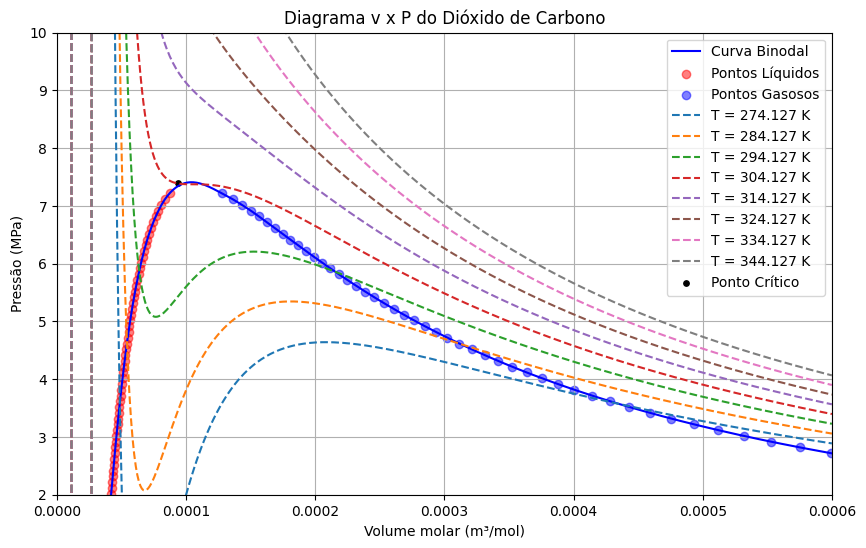

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Dados da fase líquida
v_liq = [
    0.000041990, 0.000042330, 0.000042805, 0.000043205, 0.000043608, 0.000044012,
    0.000044423, 0.000044837, 0.000045254, 0.000045678, 0.000046108, 0.000046547,
    0.000046988, 0.000047435, 0.000047896, 0.000048357, 0.000048833, 0.000049313,
    0.000049810, 0.000050310, 0.000050828, 0.000051349, 0.000051888, 0.000052437,
    0.000053005, 0.000053586, 0.000054186, 0.000054799, 0.000055434, 0.000056083,
    0.000056756, 0.000057455, 0.000058182, 0.000058926, 0.000059701, 0.000060525,
    0.000061370, 0.000062256, 0.000063184, 0.000064161, 0.000065191, 0.000066278,
    0.000067432, 0.000068661, 0.000069974, 0.000071383, 0.000072956, 0.000074619,
    0.000076511, 0.000078636, 0.000080932, 0.000083694, 0.000087191, 0.000091193
]
pressao_liq = [
    2.01800, 2.11790, 2.21790, 2.31800, 2.41800, 2.51790, 2.61790, 2.71800, 2.81790, 2.91790,
    3.01790, 3.11800, 3.21790, 3.31790, 3.41800, 3.51800, 3.61800, 3.71790, 3.81800, 3.91790,
    4.01790, 4.11800, 4.21800, 4.31800, 4.41800, 4.51800, 4.61800, 4.71800, 4.81800, 4.91790,
    5.01800, 5.11790, 5.21800, 5.31800, 5.41790, 5.51800, 5.61790, 5.71790, 5.81800, 5.91790,
    6.01790, 6.11800, 6.21790, 6.31790, 6.41790, 6.51790, 6.61790, 6.71790, 6.81800, 6.91790,
    7.01790, 7.11790, 7.21800
]

# Dados da fase gasosa
v_gas = [
    0.000599622, 0.000575551, 0.000553024, 0.000531910, 0.000512095, 0.000493424,
    0.000475763, 0.000459121, 0.000443300, 0.000428354, 0.000414129, 0.000400606,
    0.000387701, 0.000375409, 0.000363584, 0.000352317, 0.000341501, 0.000331153,
    0.000321186, 0.000311623, 0.000302382, 0.000293491, 0.000284884, 0.000276553,
    0.000268528, 0.000260741, 0.000253150, 0.000245793, 0.000238682, 0.000231710,
    0.000224923, 0.000218270, 0.000211780, 0.000205402, 0.000199119, 0.000192935,
    0.000186830, 0.000180756, 0.000174695, 0.000168727, 0.000162589, 0.000156447,
    0.000150153, 0.000143316, 0.000136033, 0.000127786
]
pressao_gas = [
    2.71800, 2.81790, 2.91790, 3.01790, 3.11800, 3.21790, 3.31790, 3.41800, 3.51800, 3.61800,
    3.71790, 3.81800, 3.91790, 4.01790, 4.11800, 4.21800, 4.31800, 4.41800, 4.51800, 4.61800,
    4.71800, 4.81800, 4.91790, 5.01800, 5.11790, 5.21800, 5.31800, 5.41790, 5.51800, 5.61800,
    5.71790, 5.81800, 5.91790, 6.01790, 6.11800, 6.21790, 6.31790, 6.41790, 6.51790, 6.61790,
    6.71790, 6.81800, 6.91790, 7.01790, 7.11790, 7.21800
]
# Combinando os dados das fases líquida e gasosa
combined_data = list(zip(v_liq, pressao_liq)) + list(zip(v_gas, pressao_gas))

# Ordenando os dados combinados
combined_data.sort(key=lambda x: x[0])

# Verificar se as listas têm o mesmo comprimento
min_len_liq = min(len(v_liq), len(pressao_liq))
min_len_gas = min(len(v_gas), len(pressao_gas))
v_liq = v_liq[:min_len_liq]
pressao_liq = pressao_liq[:min_len_liq]
v_gas = v_gas[:min_len_gas]
pressao_gas = pressao_gas[:min_len_gas]

# Separando os dados ordenados em volumes e pressões
v_total_sorted = np.array([data[0] for data in combined_data])
pressao_total_sorted = np.array([data[1] for data in combined_data])

# Gerando a curva suave entre os pontos de volume e pressões
v_smooth = np.linspace(min(v_total_sorted), max(v_total_sorted), 500)
pressao_smooth = cs(v_smooth)

# Constantes para Peng-Robinson
R = 8.314  # Constante dos gases em J/(mol·K)
Tc = 304.127  # Temperatura crítica em K
Pc = 7374800  # Pressão crítica em Pa
omega = 0.225  # Fator acêntrico

# Parâmetros de Peng-Robinson
a_c = 0.45724 * (R**2 * Tc**2) / Pc
b = 0.07780 * (R * Tc) / Pc

# Cálculo do α
def alpha(Tr):
    kappa = 0.37464 + 1.54226 * omega - 0.26992 * omega**2
    return (1 + kappa * (1 - np.sqrt(Tr)))**2

# Cálculo
def peng_robinson(T, Vm):
    Tr = T / Tc
    a = a_c * alpha(Tr)
    term1 = R * T / (Vm - b)
    term2 = a / (Vm * (Vm + b) + b * (Vm - b))
    return term1 - term2

# Definindo os limites de volumes molares
Vm = np.linspace(0.000001, 0.0006, 500)
# Definindo as temperaturas para as isotermas
temperaturas = [274.127, 284.127, 294.127, 304.127, 314.127, 324.127, 334.127, 344.127]  # Temperaturas para as isotermas em K

# Plotando o envelope de fases
plt.figure(figsize=(10, 6))
plt.plot(v_smooth, pressao_smooth, 'b-', label='Curva Binodal')

# Ilustrando os pontos originais de referência
plt.scatter(v_liq, pressao_liq, color='red', label='Pontos Líquidos', alpha=0.5)
plt.scatter(v_gas, pressao_gas, color='blue', label='Pontos Gasosos', alpha=0.5)

# Plotando as isotermas de Peng-Robinson
for T in temperaturas:
    P = peng_robinson(T, Vm)
  # linestyle='--' deixa as linhas tracejadas
    plt.plot(Vm, P / 1e6, linestyle='--', label=f'T = {T} K')

# Adiciona o ponto crítico
plt.scatter(9.403846*1e-5, 7.39, color='black', s=15, label='Ponto Crítico')

# Plota o gráfico com o matplotlib
plt.title('Diagrama v x P do Dióxido de Carbono') # Título
plt.xlabel('Volume molar (m³/mol)') # Legenda do eixo x
plt.ylabel('Pressão (MPa)') # Legenda do eixo y
plt.legend() # Insere a legenda ao lado
plt.grid(True) # Insere grades no gráfico
plt.ylim(2, 10)  # Ajuste do limite do eixo y
plt.xlim(0, 0.0006)  # Ajuste do limite do eixo x
plt.show() # Plotagem do gráfico